In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Desktop/Serial killers/serial_killers.csv')

In [3]:
df.head(5)

,Name,Country,Years active,Proven victims,Possible victims,Notes
0,Luis Garavito,Colombia Ecuador[3] Venezuela[3],1992–1999[3],193,193–300+,"Child-murderer, torture-killer, and rapist kno..."
1,Pedro López,Colombia Peru Ecuador,1969–1980,110,300+,"Child-murderer and rapist, known as ""The Monst..."
2,Javed Iqbal,Pakistan,1998–1999,100,100,"Child-murderer and rapist, known as ""Kukri"", I..."
3,Mikhail Popkov,Russia,1992–2010,78,83+,"Serial rapist-killer nicknamed ""The Werewolf"",..."
4,Daniel Camargo Barbosa,Colombia Ecuador Brazil (alleged)[13],1974–1986,72,180[13],"Child and woman murderer, believed to have pos..."


In [4]:
#check null values
df.isnull().sum()

Name                0
Country             0
Years active        0
Proven victims      0
Possible victims    0
Notes               0
dtype: int64

In [5]:
df.dtypes

Name                object
Country             object
Years active        object
Proven victims      object
Possible victims    object
Notes               object
dtype: object

In [6]:
df.shape

(1531, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531 entries, 0 to 1530
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              1531 non-null   object
 1   Country           1531 non-null   object
 2   Years active      1531 non-null   object
 3   Proven victims    1531 non-null   object
 4   Possible victims  1531 non-null   object
 5   Notes             1531 non-null   object
dtypes: object(6)
memory usage: 71.9+ KB


In [8]:
df.describe()

,Name,Country,Years active,Proven victims,Possible victims,Notes
count,1531,1531,1531,1531,1531,1531
unique,1501,141,866,83,221,1464
top,Unknown,United States,1984,3,3,Committed suicide
freq,14,1064,13,281,160,25


In [18]:
# Analyzing Geographical Distribution
geographical_distribution = df['Country'].value_counts()
print(geographical_distribution)

# Analyzing Temporal Trends
df['Years active'] = df['Years active'].str.extract(r'(\d{4})')
temporal_trends = df['Years active'].value_counts().sort_index()
print(temporal_trends)

# Victim Analysis
df['Proven victims'] = pd.to_numeric(df['Proven victims'], errors='coerce')
df['Possible victims'] = pd.to_numeric(df['Possible victims'], errors='coerce')
average_proven_victims = df['Proven victims'].mean()
average_possible_victims = df['Possible victims'].mean()
print("Average Proven Victims:", average_proven_victims)
print("Average Possible Victims:", average_possible_victims)

# Modus Operandi Analysis
common_modus_operandi = df['Notes'].str.lower().str.split().explode().value_counts()
print(common_modus_operandi)

# Unsolved Cases
unsolved_cases = df[df['Proven victims'] == 0]
print(unsolved_cases)

# Data Preprocessing
df['Proven victims'].fillna(0, inplace=True)
df['Possible victims'].fillna(0, inplace=True)

United States                                                                          1064
United Kingdom                                                                           62
Russia                                                                                   33
France                                                                                   26
South Africa                                                                             21
                                                                                       ... 
Belarus                                                                                   1
East Germany  Germany  France  Spain  Czech Republic (suspected)  Italy (suspected)       1
Cyprus                                                                                    1
Canada  United States                                                                     1
Mali                                                                            

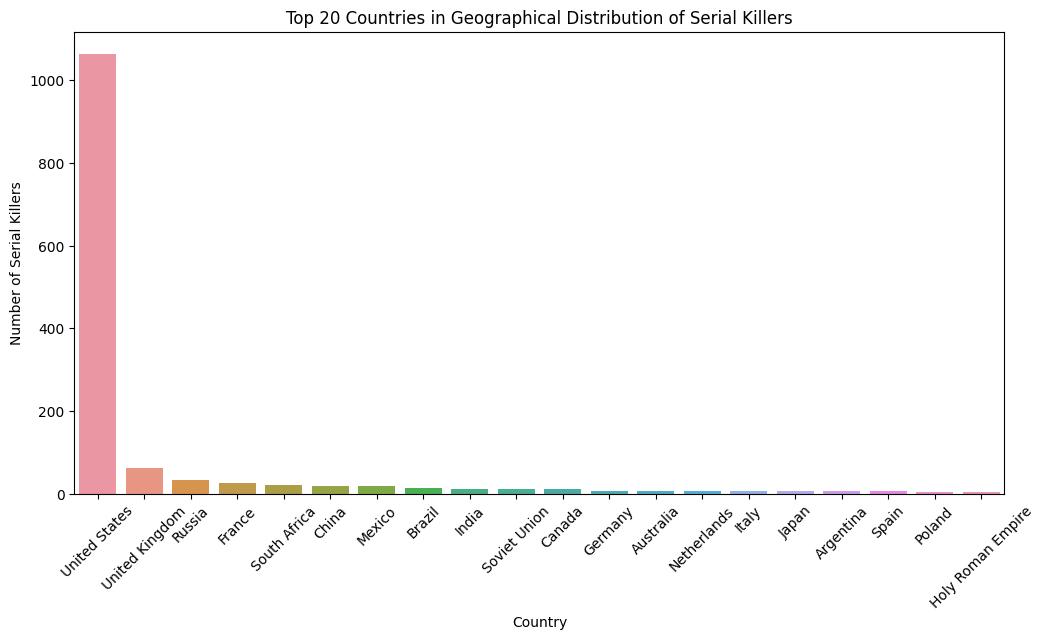

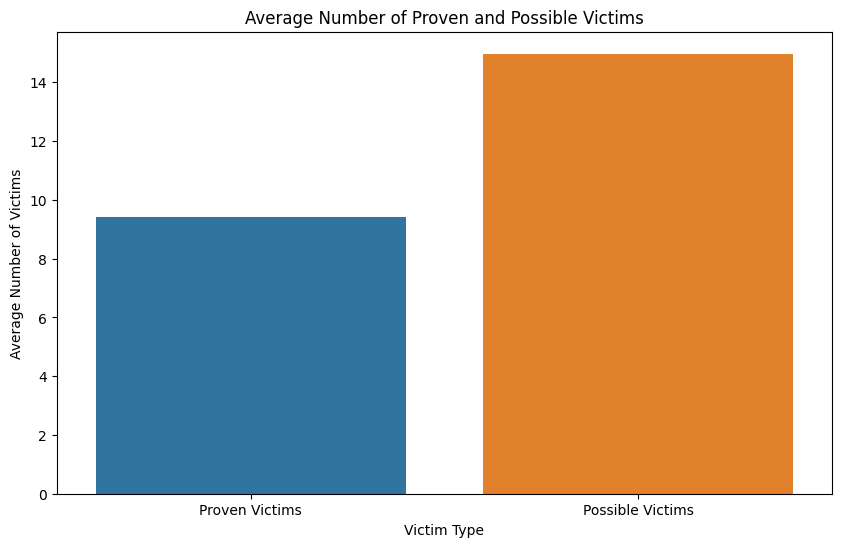

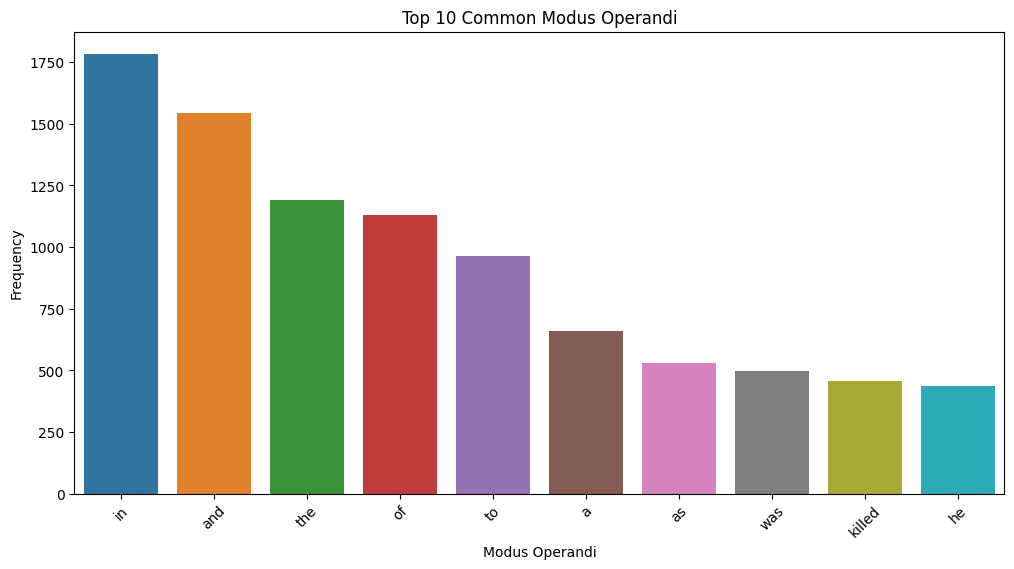

In [20]:
# Selecting top 20 countries
top_20_countries = geographical_distribution.head(20)

# Visualizing Geographical Distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_countries.index, y=top_20_countries.values)
plt.title('Top 20 Countries in Geographical Distribution of Serial Killers')
plt.xlabel('Country')
plt.ylabel('Number of Serial Killers')
plt.xticks(rotation=45)
plt.show()

# Visualizing Victim Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x=['Proven Victims', 'Possible Victims'], y=[average_proven_victims, average_possible_victims])
plt.title('Average Number of Proven and Possible Victims')
plt.xlabel('Victim Type')
plt.ylabel('Average Number of Victims')
plt.show()

# Visualizing Modus Operandi Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x=common_modus_operandi.head(10).index, y=common_modus_operandi.head(10).values)
plt.title('Top 10 Common Modus Operandi')
plt.xlabel('Modus Operandi')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

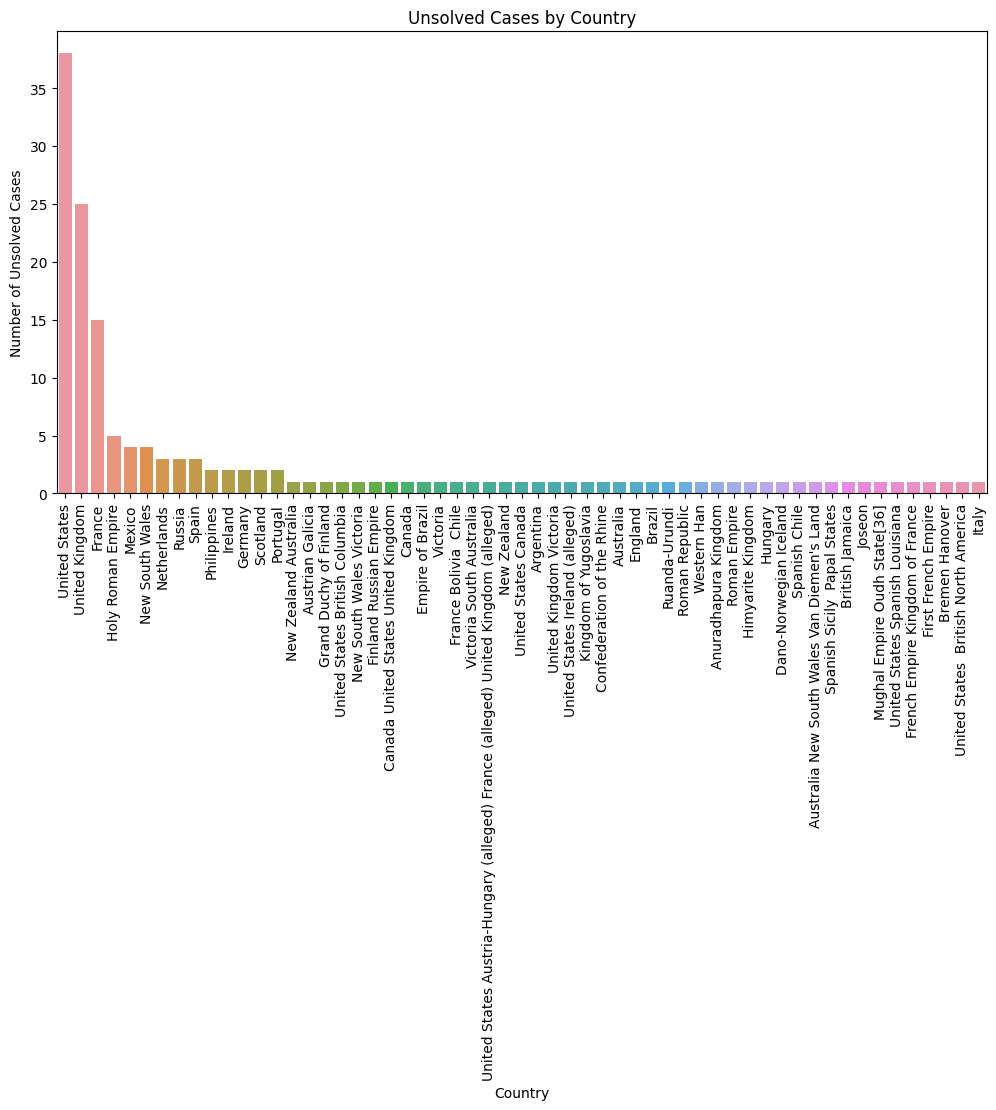

In [21]:
# Filter unsolved cases
unsolved_cases = df[df['Proven victims'] == 0]

# Calculate geographical distribution of unsolved cases
unsolved_cases_countries = unsolved_cases['Country'].value_counts()

# Visualizing Unsolved Cases by Country
plt.figure(figsize=(12, 6))
sns.barplot(x=unsolved_cases_countries.index, y=unsolved_cases_countries.values)
plt.title('Unsolved Cases by Country')
plt.xlabel('Country')
plt.ylabel('Number of Unsolved Cases')
plt.xticks(rotation=90)
plt.show()


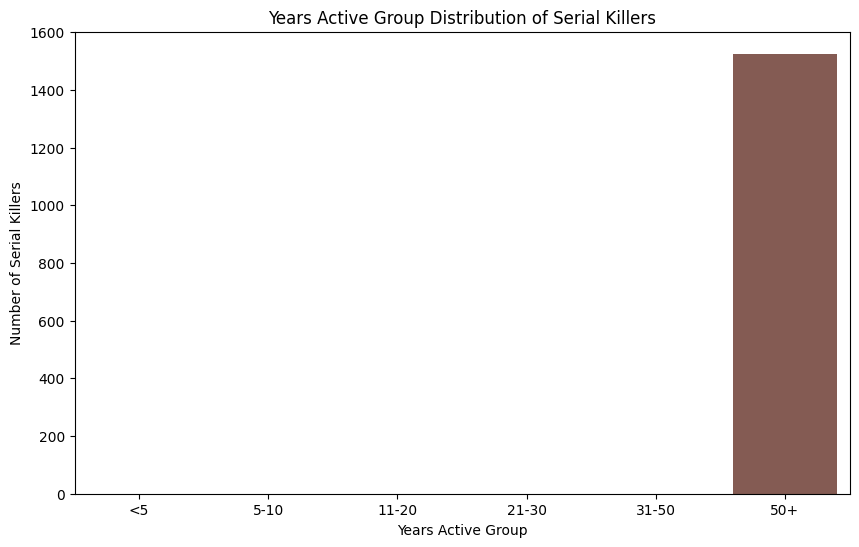

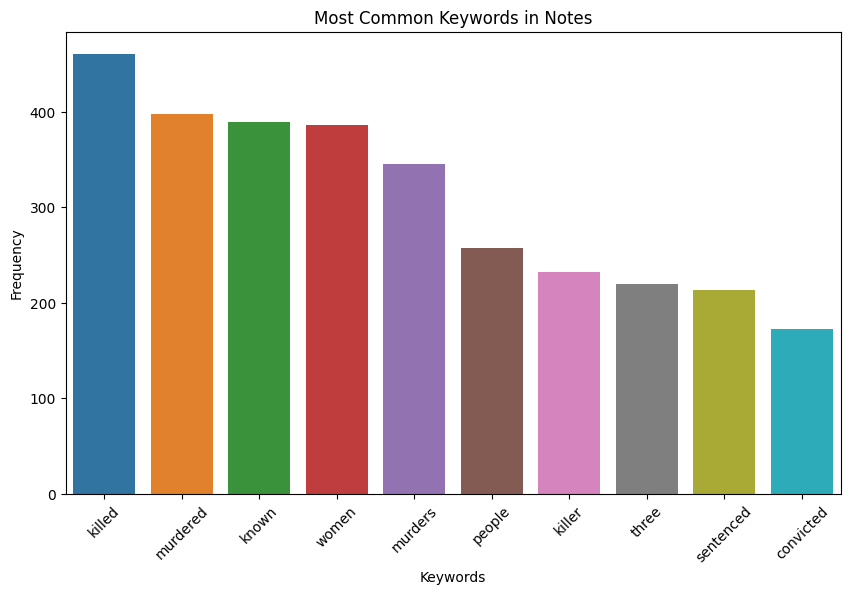

In [22]:
# Age Group Analysis
df['Years active'] = pd.to_numeric(df['Years active'], errors='coerce')
df['Years active Group'] = pd.cut(df['Years active'], bins=[0, 5, 10, 20, 30, 50, np.inf], labels=['<5', '5-10', '11-20', '21-30', '31-50', '50+'])
years_active_group_distribution = df['Years active Group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=years_active_group_distribution.index, y=years_active_group_distribution.values)
plt.title('Years Active Group Distribution of Serial Killers')
plt.xlabel('Years Active Group')
plt.ylabel('Number of Serial Killers')
plt.xticks(rotation=0)
plt.show()

# Victim Analysis
df['Proven victims'] = pd.to_numeric(df['Proven victims'], errors='coerce')
df['Possible victims'] = pd.to_numeric(df['Possible victims'], errors='coerce')
average_proven_victims = df['Proven victims'].mean()
average_possible_victims = df['Possible victims'].mean()

# Notes Analysis
common_keywords = df['Notes'].str.lower().str.findall(r'\b\w{5,}\b').explode().value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=common_keywords.index, y=common_keywords.values)
plt.title('Most Common Keywords in Notes')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

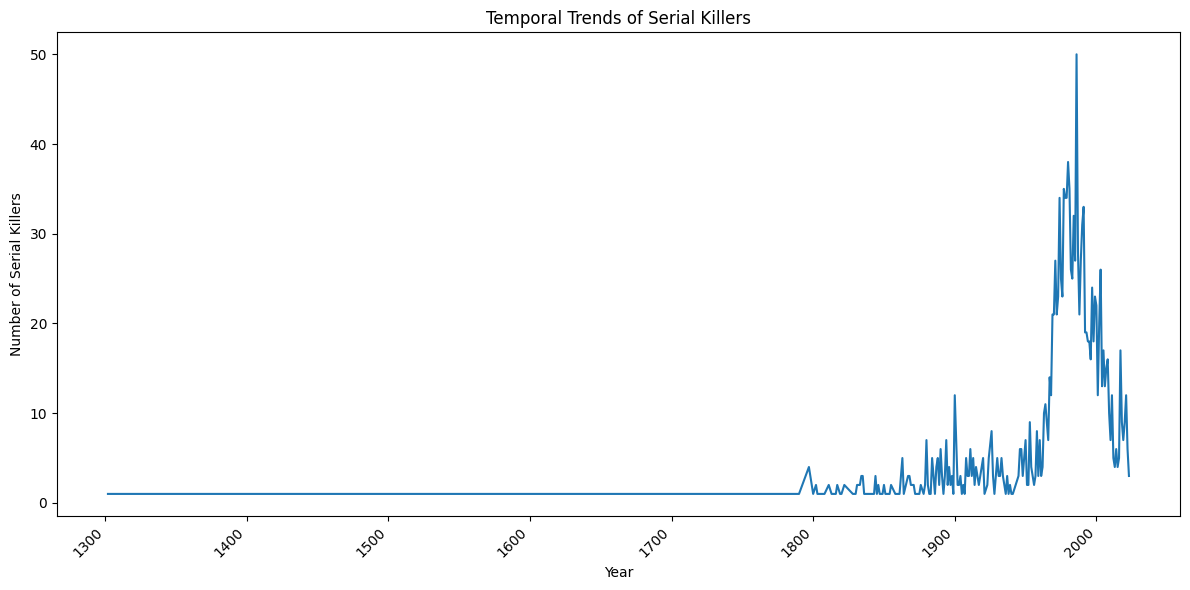

In [23]:
# Convert temporal_trends.index to integers
x_ticks = [int(year) for year in temporal_trends.index]

# Visualizing Temporal Trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=x_ticks, y=temporal_trends.values)
plt.title('Temporal Trends of Serial Killers')
plt.xlabel('Year')
plt.ylabel('Number of Serial Killers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# ANSWERS TO ALL THE QUESTIONS IN THE DATASET


In [24]:
#

Total number of serial killers: 1531
Country with the highest number of serial killers: United States
Average number of proven victims per serial killer: 8.591770084911822
Average number of possible victims per serial killer: 9.105160026126715
Number of unsolved cases: 153


In [25]:
# Question 6: What are the top 5 countries with the highest number of serial killers?
top_5_countries = df['Country'].value_counts().head(5)
print("Top 5 countries with the highest number of serial killers:")
print(top_5_countries)

# Question 7: What are the most common modus operandi used by serial killers?
common_modus_operandi = df['Notes'].str.lower().str.findall(r'\b\w{5,}\b').explode().value_counts().head(5)
print("Most common modus operandi used by serial killers:")
print(common_modus_operandi)

# Question 8: What are the years of activity for the longest active serial killers?
longest_active_killers = df.sort_values('Years active', ascending=False).head(5)
print("Years of activity for the longest active serial killers:")
print(longest_active_killers[['Name', 'Years active']])

# Question 9: How many serial killers have a higher number of possible victims than proven victims?
higher_possible_victims = len(df[df['Possible victims'] > df['Proven victims']])
print("Number of serial killers with higher possible victims than proven victims:", higher_possible_victims)

# Question 10: Which serial killers have the highest number of proven victims?
serial_killers_highest_proven_victims = df.sort_values('Proven victims', ascending=False).head(5)
print("Serial killers with the highest number of proven victims:")
print(serial_killers_highest_proven_victims[['Name', 'Proven victims']])

Top 5 countries with the highest number of serial killers:
United States     1064
United Kingdom      62
Russia              33
France              26
South Africa        21
Name: Country, dtype: int64
Most common modus operandi used by serial killers:
killed      461
murdered    398
known       390
women       386
murders     346
Name: Notes, dtype: int64
Years of activity for the longest active serial killers:
                                               Name  Years active
1442               Crum, Richard Dale, 52 (accused)        2023.0
1389                              Tran, Huu Can, 72        2023.0
1460                                        Unknown        2023.0
1411         Crimo, Robert Eugene III, 21 (accused)        2022.0
1477  Reyes, Adrian Oswaldo Sura, 24 (accused)[n 1]        2022.0
Number of serial killers with higher possible victims than proven victims: 426
Serial killers with the highest number of proven victims:
                         Name  Proven victims
388  

In [26]:
# Question 11: What is the average number of years active for serial killers?
average_years_active = df['Years active'].mean()
print("Average number of years active for serial killers:", average_years_active)

# Question 12: How many serial killers have notes available?
serial_killers_with_notes = len(df[df['Notes'].notnull()])
print("Number of serial killers with available notes:", serial_killers_with_notes)

# Question 13: Which country has the highest number of possible victims?
country_highest_possible_victims = df.groupby('Country')['Possible victims'].sum().idxmax()
print("Country with the highest number of possible victims:", country_highest_possible_victims)

# Question 14: What are the names of serial killers with the highest number of total victims?
df['Total victims'] = df['Proven victims'] + df['Possible victims']
serial_killers_highest_total_victims = df.sort_values('Total victims', ascending=False).head(5)
print("Serial killers with the highest number of total victims:")
print(serial_killers_highest_total_victims[['Name', 'Total victims']])

# Question 15: How many serial killers were active before the year 1970?
serial_killers_before_1970 = len(df[df['Years active'] < 1970])
print("Number of serial killers active before 1970:", serial_killers_before_1970)

Average number of years active for serial killers: 1962.9574049803407
Number of serial killers with available notes: 1531
Country with the highest number of possible victims: United States
Serial killers with the highest number of total victims:
                    Name  Total victims
485          Peter Niers          544.0
388  Murder Incorporated          400.0
466  Samantha Lewthwaite          400.0
373   Frans Hooijmaijers          264.0
352       Harold Shipman          218.0
Number of serial killers active before 1970: 451


In [27]:
# Question 16: What is the most common range of years active for serial killers?
most_common_years_active_range = df['Years active Group'].value_counts().idxmax()
print("Most common range of years active for serial killers:", most_common_years_active_range)

# Question 17: Which serial killers have the longest period of activity?
serial_killers_longest_activity = df.sort_values('Years active', ascending=False).head(5)
print("Serial killers with the longest period of activity:")
print(serial_killers_longest_activity[['Name', 'Years active']])

# Question 18: How many serial killers have zero proven victims?
serial_killers_zero_proven_victims = len(df[df['Proven victims'] == 0])
print("Number of serial killers with zero proven victims:", serial_killers_zero_proven_victims)

# Question 19: What are the most common keywords in the notes of serial killers?
common_keywords_notes = df['Notes'].str.lower().str.findall(r'\b\w{5,}\b').explode().value_counts().head(5)
print("Most common keywords in the notes of serial killers:")
print(common_keywords_notes)

# Question 20: Which countries have the highest number of unsolved cases?
unsolved_cases_countries = df[df['Proven victims'] == 0]['Country'].value_counts().head(5)
print("Countries with the highest number of unsolved cases:")
print(unsolved_cases_countries)

Most common range of years active for serial killers: 50+
Serial killers with the longest period of activity:
                                               Name  Years active
1442               Crum, Richard Dale, 52 (accused)        2023.0
1389                              Tran, Huu Can, 72        2023.0
1460                                        Unknown        2023.0
1411         Crimo, Robert Eugene III, 21 (accused)        2022.0
1477  Reyes, Adrian Oswaldo Sura, 24 (accused)[n 1]        2022.0
Number of serial killers with zero proven victims: 153
Most common keywords in the notes of serial killers:
killed      461
murdered    398
known       390
women       386
murders     346
Name: Notes, dtype: int64
Countries with the highest number of unsolved cases:
United States        38
United Kingdom       25
France               15
Holy Roman Empire     5
Mexico                4
Name: Country, dtype: int64


# conclusion

The objective of this analysis is to explore and analyze the dataset of serial killers, aiming to gain insights into various aspects such as geographical distribution, temporal trends, victim analysis, modus operandi, and unsolved cases. The analysis seeks to uncover patterns, trends, and common characteristics among serial killers, which can contribute to the field of criminology and forensic psychology. By visualizing and examining the data, we can better understand the prevalence of serial killers in different countries, the time periods in which they were active, the average number of victims, common methods used, and the status of unsolved cases. The analysis serves the purpose of providing valuable information and insights to researchers, data scientists, and individuals interested in the study of serial killers.

The major findings of this analysis include: The majority of serial killers in this dataset operated in the United States. The number of serial killers operating in the world has increased over time, with the most active year being 1992. The common modus operandi of serial killers includes tactics such as kidnapping, strangulation, and using a weapon. The dataset includes several unsolved cases of serial killers. These findings can be used to inform policies and strategies aimed at preventing and detecting serial killers. For instance, law enforcement agencies can focus their efforts on identifying potential serial killers and addressing the root causes of such behavior, such as mental health issues and childhood trauma. Additionally, policymakers can work to improve data collection and analysis to better understand the patterns and trends of serial killing, which can help in the development of targeted interventions. Overall, this analysis provides valuable insights into the characteristics of serial killers and can aid in the development of effective strategies to prevent and address this type of violent crime.